In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
data = pd.read_csv("Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
data.shape

(400, 11)

In [ ]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
data.columns


Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
data.dtypes


Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [ ]:
data.isnull().sum()


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

**NO Missing values and NO out liers in Dataset**

**Conversion of Target variable Sales into Categorical Variable**

In [ ]:
len(data.Sales.unique())


336

In [ ]:
data.Sales.values

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,

In [ ]:
data['Sales'] =pd.cut(np.array([9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,  4.96,  4.47,  8.41,  6.5 ,  9.54,  7.62,  3.67,
        6.44,  5.17,  6.52, 10.27, 12.3 ,  6.03,  6.53,  7.44,  0.53,
        9.09,  8.77,  3.9 , 10.51,  7.56, 11.48, 10.49, 10.77,  7.64,
        5.93,  6.89,  7.71,  7.49, 10.21, 12.53,  9.32,  4.67,  2.93,
        3.63,  5.68,  8.22,  0.37,  6.71,  6.71,  7.3 , 11.48,  8.01,
       12.49,  9.03,  6.38,  0.  ,  7.54,  5.61, 10.48, 10.66,  7.78,
        4.94,  7.43,  4.74,  5.32,  9.95, 10.07,  8.68,  6.03,  8.07,
       12.11,  8.79,  6.67,  7.56, 13.28,  7.23,  4.19,  4.1 ,  2.52,
        3.62,  6.42,  5.56,  5.94,  4.1 ,  2.05,  8.74,  5.68,  4.97,
        8.19,  7.78,  3.02,  4.36,  9.39, 12.04,  8.23,  4.83,  2.34,
        5.73,  4.34,  9.7 , 10.62, 10.59,  6.43,  7.49,  3.45,  4.1 ,
        6.68,  7.8 ,  8.69,  5.4 , 11.19,  5.16,  8.09, 13.14,  8.65,
        9.43,  5.53,  9.32,  9.62,  7.36,  3.89, 10.31, 12.01,  4.68,
        7.82,  8.78, 10.  ,  6.9 ,  5.04,  5.36,  5.05,  9.16,  3.72,
        8.31,  5.64,  9.58,  7.71,  4.2 ,  8.67,  3.47,  5.12,  7.67,
        5.71,  6.37,  7.77,  6.95,  5.31,  9.1 ,  5.83,  6.53,  5.01,
       11.99,  4.55, 12.98, 10.04,  7.22,  6.67,  6.93,  7.8 ,  7.22,
        3.42,  2.86, 11.19,  7.74,  5.36,  6.97,  7.6 ,  7.53,  6.88,
        6.98,  8.75,  9.49,  6.64, 11.82, 11.28, 12.66,  4.21,  8.21,
        3.07, 10.98,  9.4 ,  8.57,  7.41,  5.28, 10.01, 11.93,  8.03,
        4.78,  5.9 ,  9.24, 11.18,  9.53,  6.15,  6.8 ,  9.33,  7.72,
        6.39, 15.63,  6.41, 10.08,  6.97,  5.86,  7.52,  9.16, 10.36,
        2.66, 11.7 ,  4.69,  6.23,  3.15, 11.27,  4.99, 10.1 ,  5.74,
        5.87,  7.63,  6.18,  5.17,  8.61,  5.97, 11.54,  7.5 ,  7.38,
        7.81,  5.99,  8.43,  4.81,  8.97,  6.88, 12.57,  9.32,  8.64,
       10.44, 13.44,  9.45,  5.3 ,  7.02,  3.58, 13.36,  4.17,  3.13,
        8.77,  8.68,  5.25, 10.26, 10.5 ,  6.53,  5.98, 14.37, 10.71,
       10.26,  7.68,  9.08,  7.8 ,  5.58,  9.44,  7.9 , 16.27,  6.81,
        6.11,  5.81,  9.64,  3.9 ,  4.95,  9.35, 12.85,  5.87,  5.32,
        8.67,  8.14,  8.44,  5.47,  6.1 ,  4.53,  5.57,  5.35, 12.57,
        6.14,  7.41,  5.94,  9.71]),3,labels=["Low","Medium","High"])

In [ ]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Medium,100,79,7,284,95,Bad,50,12,Yes,Yes


**Visulization**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
encoder1=LabelEncoder()
data['ShelveLoc'] =encoder1.fit_transform(data['ShelveLoc'])
data['Urban'] =encoder1.fit_transform(data['Urban'])
data['US'] =encoder1.fit_transform(data['US'])

<Axes: ylabel='count'>

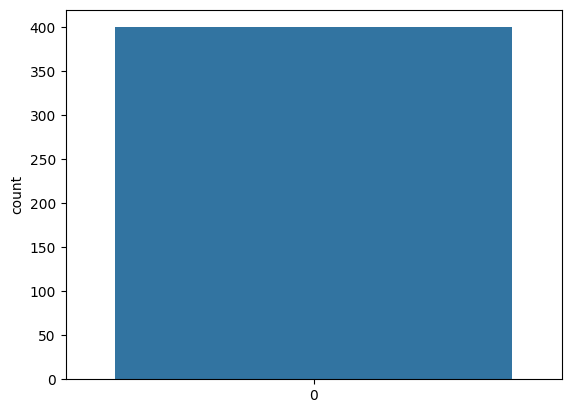

In [ ]:
sns.countplot(data['CompPrice'])


<Axes: ylabel='count'>

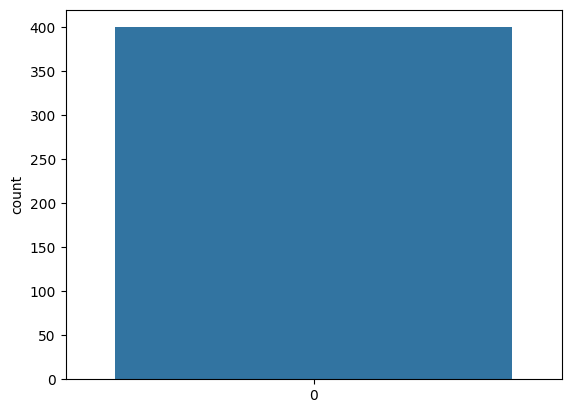

In [ ]:
sns.countplot(data['CompPrice'])

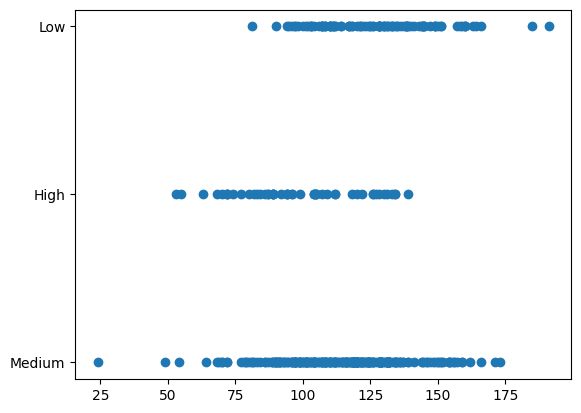

In [ ]:
plt.scatter(x="Price",y="Sales",data =data)

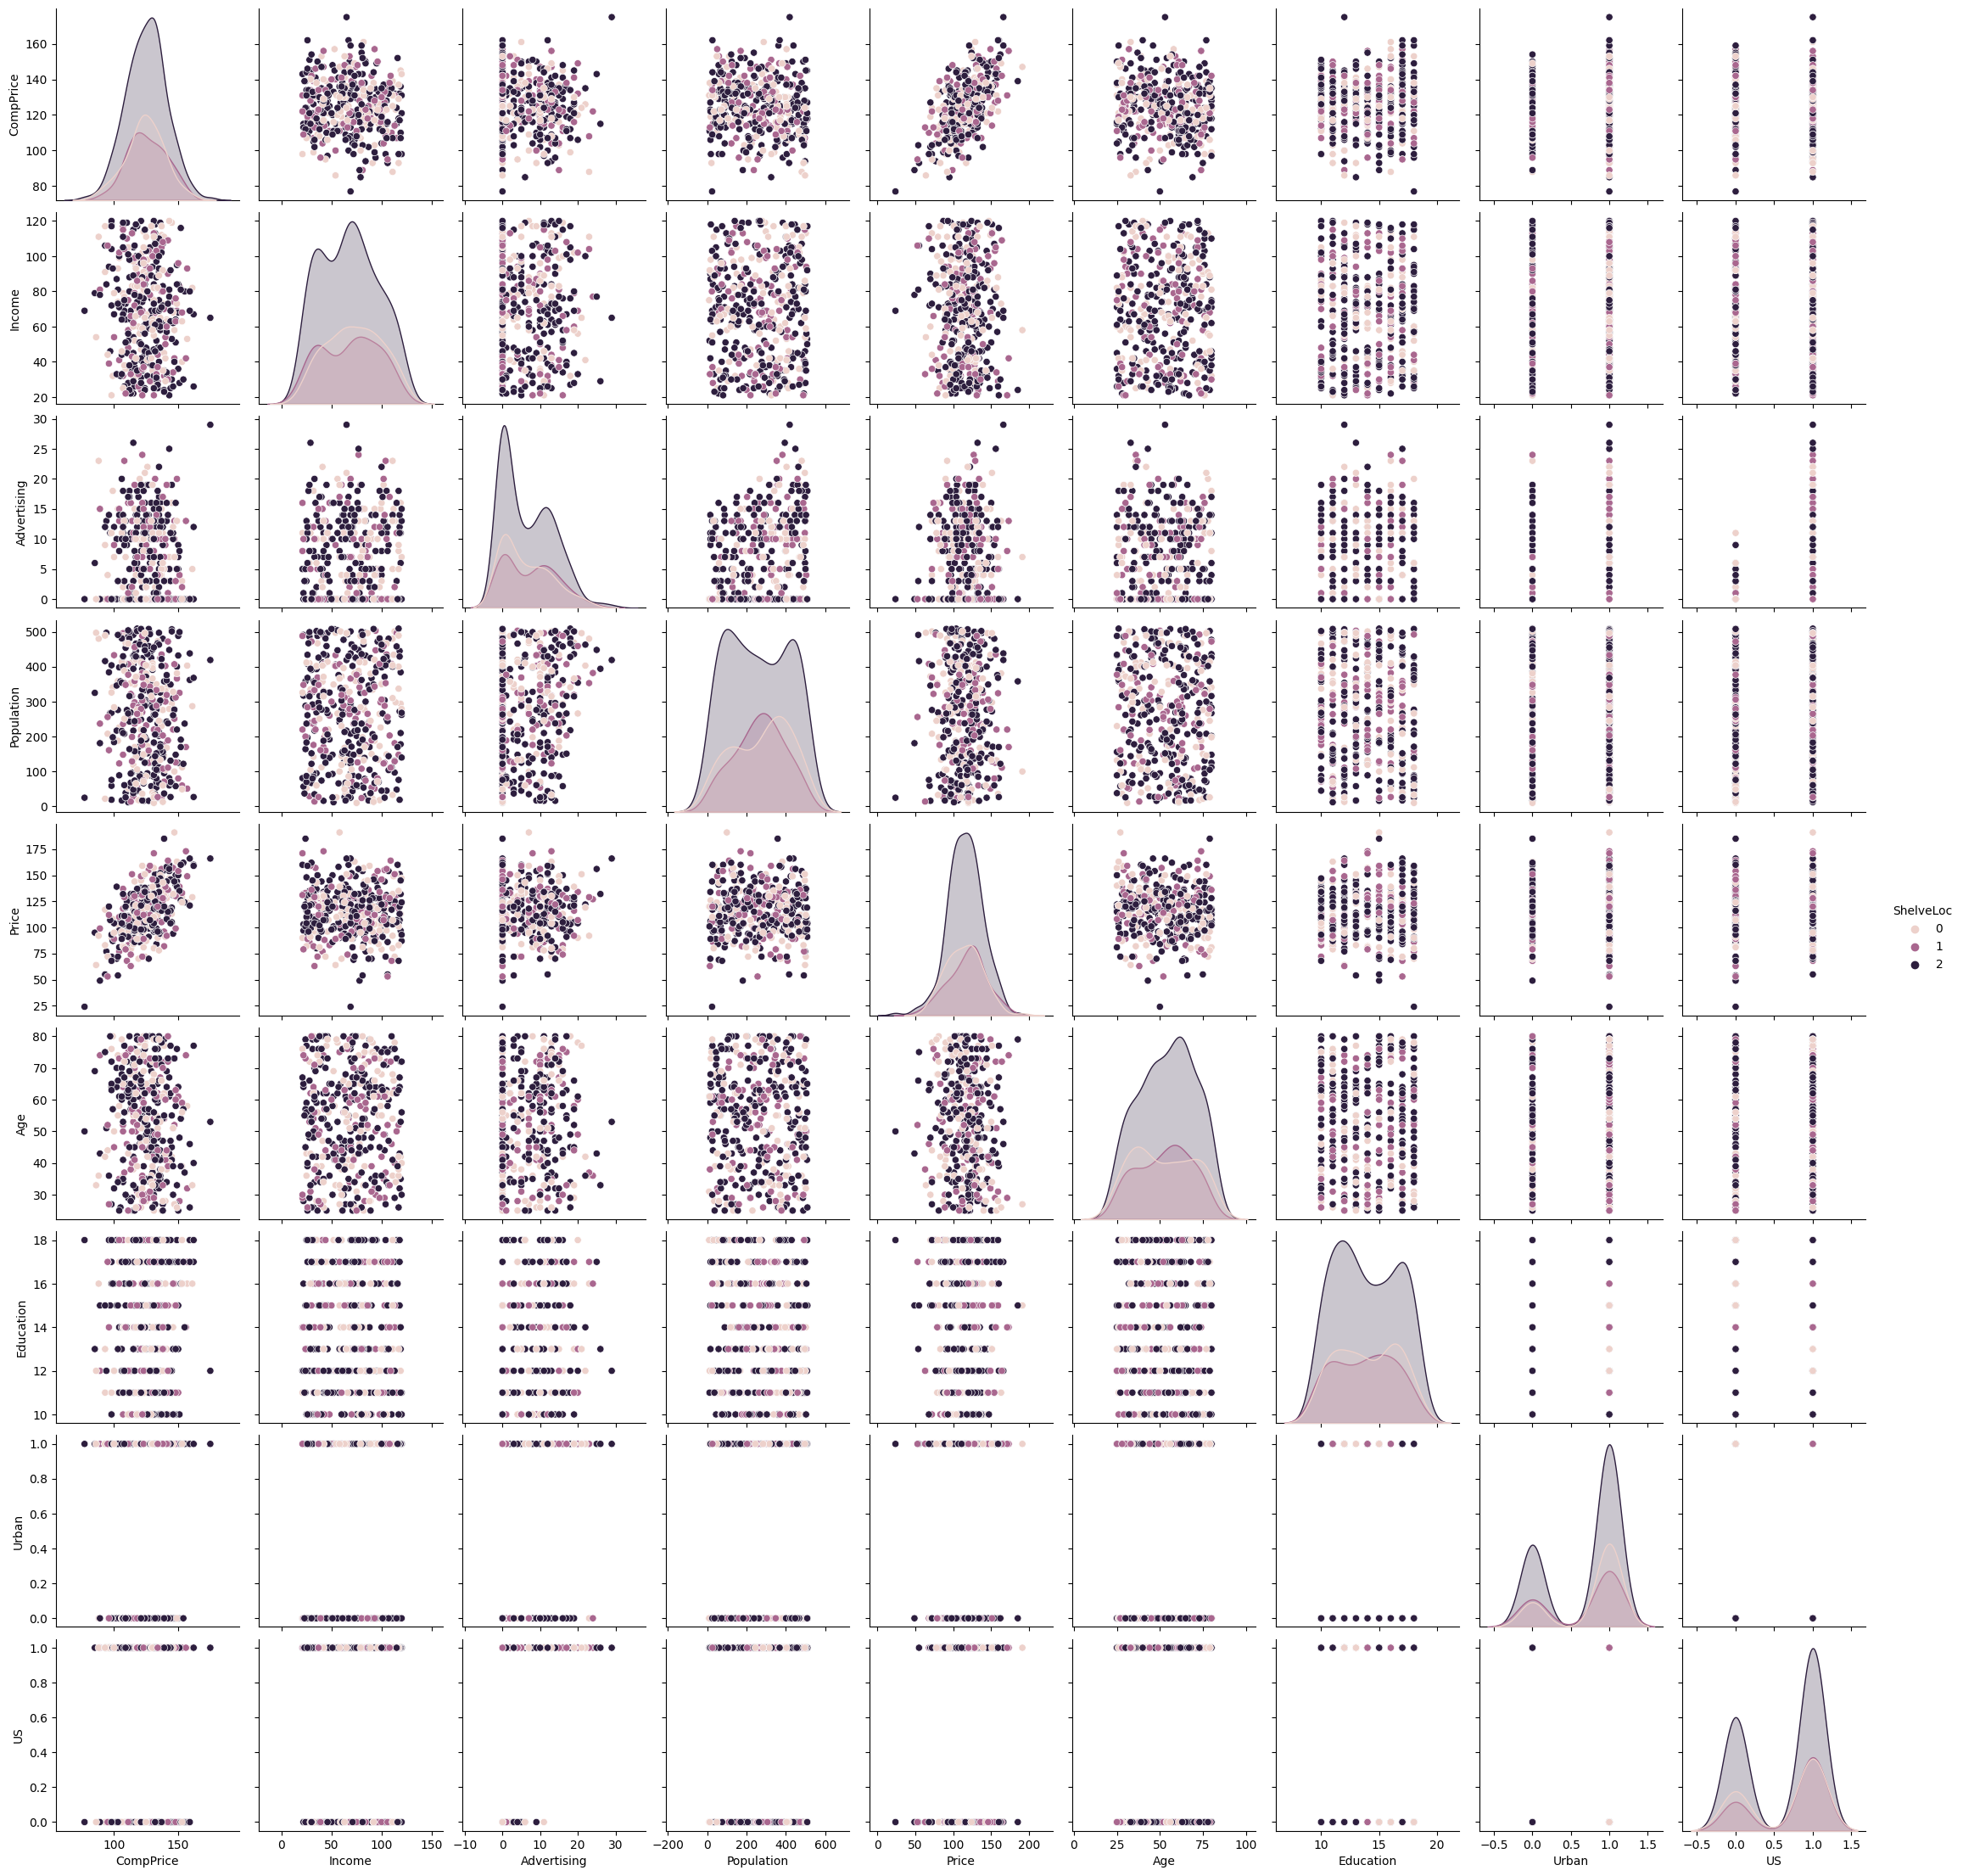

In [ ]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=data, hue = 'ShelveLoc')

**Checking the corealtion with in the data**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
data.corr()



<ipython-input-18-48ba11afb8f1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085
US,0.016869,0.089601,0.684460,0.060564,0.057861,-0.039760,0.008652,-0.078250,0.047085,1.000000


(array([247.,   0.,   0.,   0.,   0.,  51.,   0.,   0.,   0., 102.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

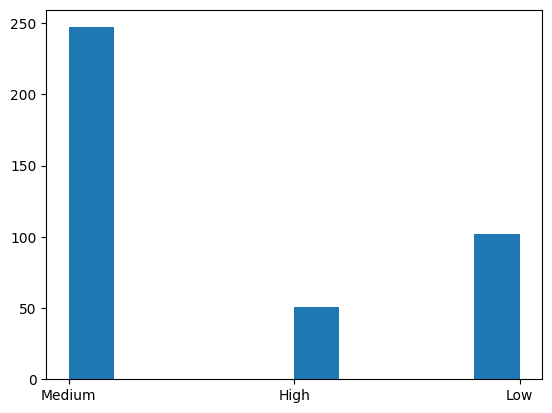

In [ ]:
plt.hist(data['Sales'])

(array([41., 39., 39., 35., 32., 46., 45., 39., 38., 46.]),
 array([ 10. ,  59.9, 109.8, 159.7, 209.6, 259.5, 309.4, 359.3, 409.2,
        459.1, 509. ]),
 <BarContainer object of 10 artists>)

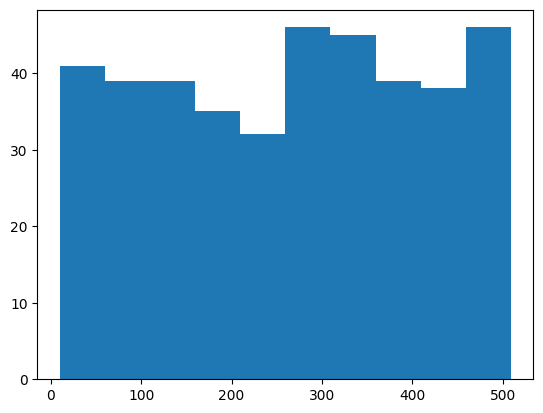

In [ ]:
plt.hist(data['Population'])

(array([  1.,   4.,  14.,  36.,  91., 106.,  95.,  37.,  14.,   2.]),
 array([ 24. ,  40.7,  57.4,  74.1,  90.8, 107.5, 124.2, 140.9, 157.6,
        174.3, 191. ]),
 <BarContainer object of 10 artists>)

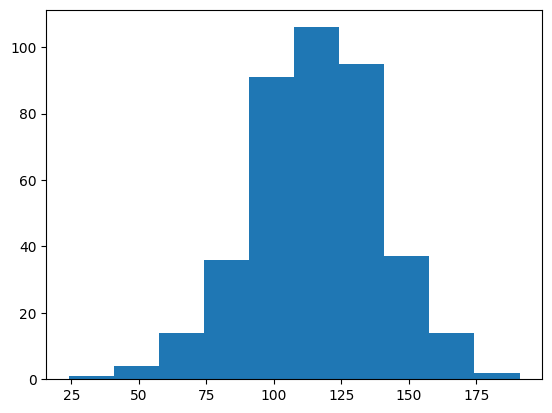

In [ ]:
plt.hist(data['Price'])

(array([41., 45., 37., 32., 55., 46., 43., 38., 29., 34.]),
 array([ 21. ,  30.9,  40.8,  50.7,  60.6,  70.5,  80.4,  90.3, 100.2,
        110.1, 120. ]),
 <BarContainer object of 10 artists>)

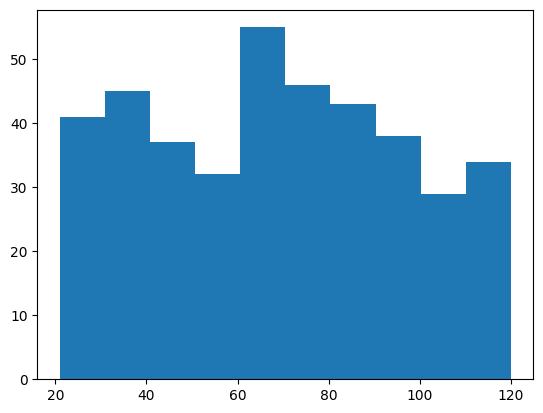

In [ ]:
plt.hist(data['Income'])

(array([43., 32., 35., 38., 38., 41., 51., 35., 39., 48.]),
 array([25. , 30.5, 36. , 41.5, 47. , 52.5, 58. , 63.5, 69. , 74.5, 80. ]),
 <BarContainer object of 10 artists>)

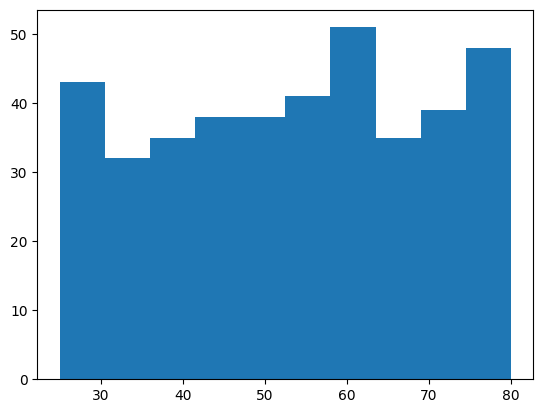

In [ ]:
plt.hist(data['Age'])

(array([142.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 258.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

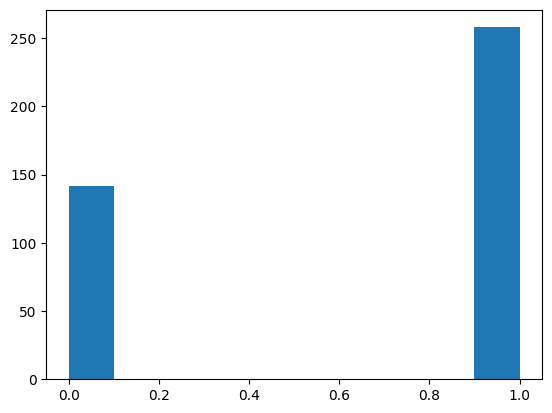

In [ ]:
plt.hist(data['US'])

<Figure size 2000x2000 with 0 Axes>

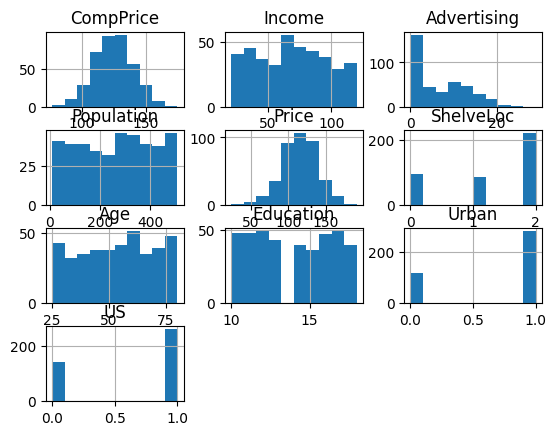

<Figure size 2000x2000 with 0 Axes>

In [ ]:
data.hist()
plt.figure(figsize =(20,20))

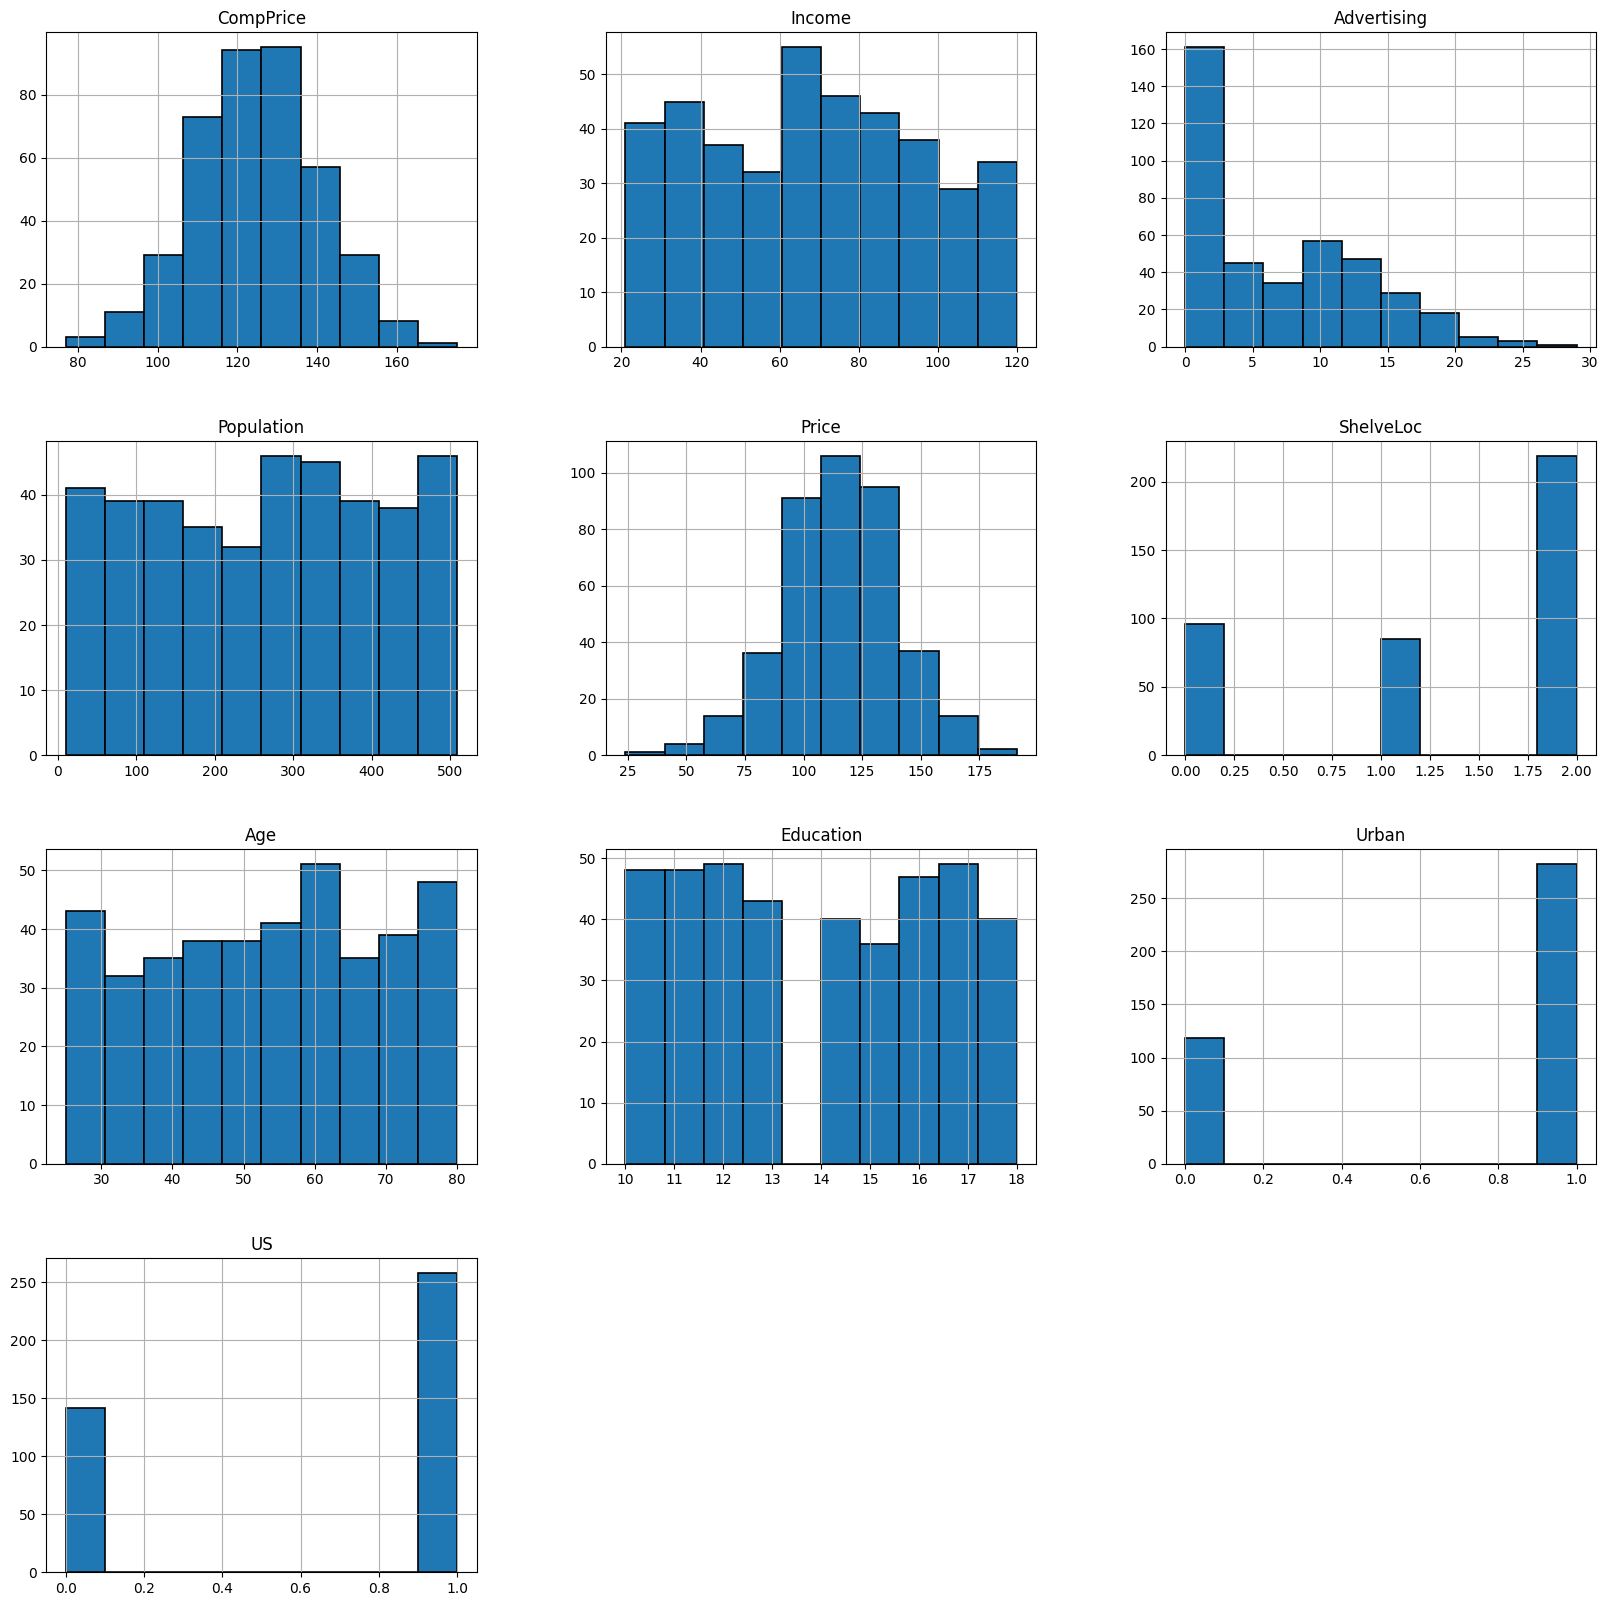

In [ ]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<ipython-input-27-e7f92dd23fee>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='terrain')


<Axes: >

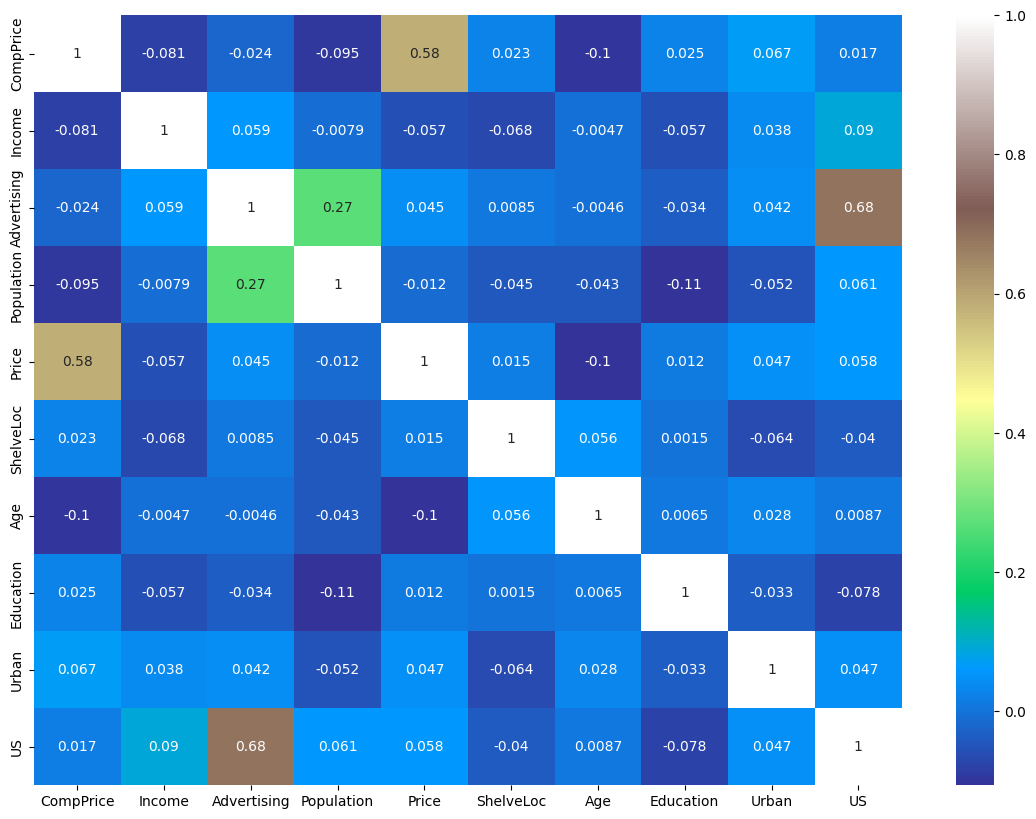

In [ ]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='terrain')

<Figure size 2000x2000 with 0 Axes>

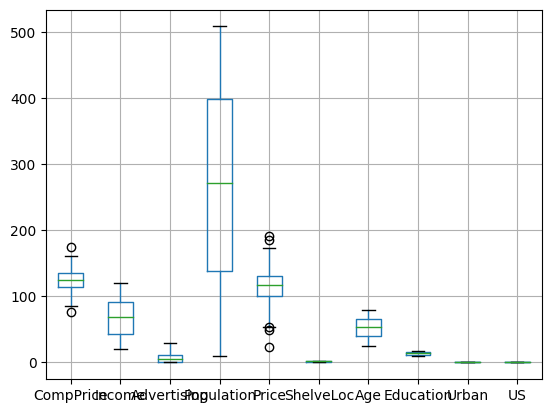

<Figure size 2000x2000 with 0 Axes>

In [ ]:
data.boxplot()
plt.figure(figsize =(20,20))

<Figure size 2000x2000 with 0 Axes>

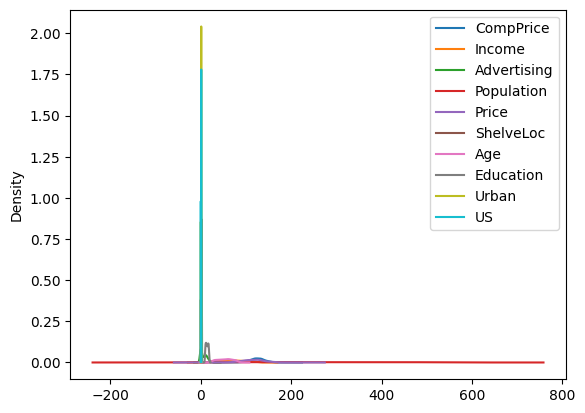

<Figure size 2000x2000 with 0 Axes>

In [ ]:
data.plot(kind="kde")
plt.figure(figsize =(20,20))

<ipython-input-30-a7bcc677ebfa>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rk= sns.distplot(data['Income'], fit=norm,kde=True)


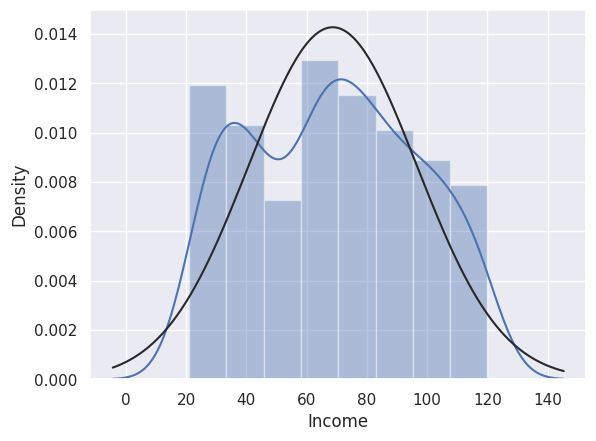

In [ ]:
#Dist plot
from scipy.stats import norm
import seaborn as sns
sns.set_theme()
rk= sns.distplot(data['Income'], fit=norm,kde=True)

<ipython-input-31-85eff1dd621b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rk= sns.distplot(data['Price'], fit=norm,kde=True)


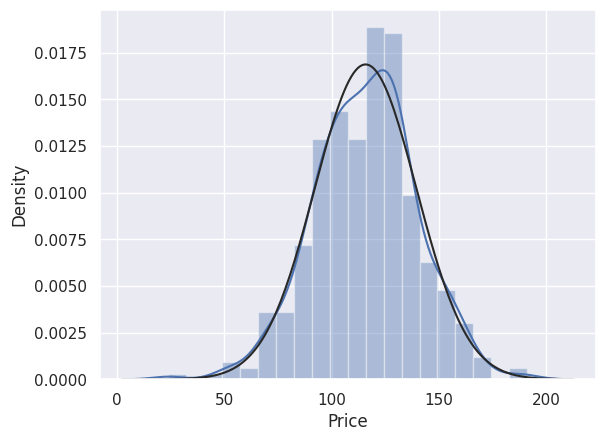

In [ ]:
sns.set_theme()
rk= sns.distplot(data['Price'], fit=norm,kde=True)

<ipython-input-32-921b497cda16>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rk= sns.distplot(data['Age'], fit=norm,kde=True)


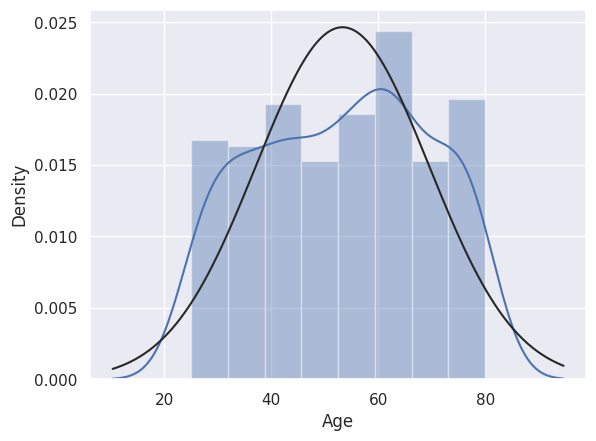

In [ ]:
sns.set_theme()
rk= sns.distplot(data['Age'], fit=norm,kde=True)

<ipython-input-33-d0cbfac53c44>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rk= sns.distplot(data['US'], fit=norm,kde=True)


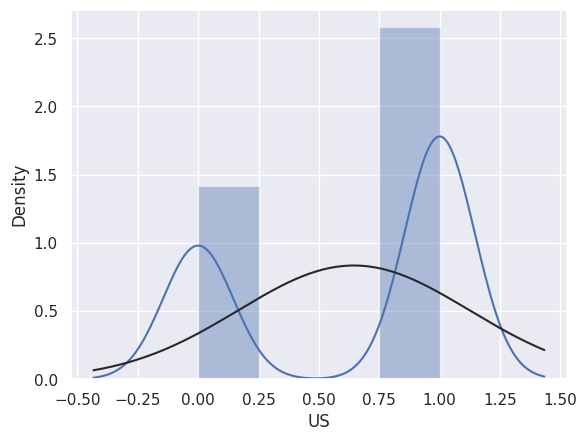

In [ ]:
sns.set_theme()
rk= sns.distplot(data['US'], fit=norm,kde=True)

In [ ]:
X=data.iloc[:,1:]
y=data['Sales']

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state= 10)

In [ ]:
y_test

332    Medium
111    Medium
352      High
205    Medium
56       High
        ...  
17       High
225    Medium
223       Low
59        Low
114    Medium
Name: Sales, Length: 120, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model=RandomForestClassifier(n_estimators=100,max_features=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred

array(['Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium',
       'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Med

In [ ]:
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.6583333333333333

In [ ]:
count_misclassified =(y_test != y_pred).sum()
count_misclassified

41

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       1.00      0.06      0.11        17
         Low       0.50      0.52      0.51        25
      Medium       0.70      0.83      0.76        78

    accuracy                           0.66       120
   macro avg       0.73      0.47      0.46       120
weighted avg       0.70      0.66      0.62       120



When we use the model_selection =train_test_split we got the acccuracy as 65% and we try with KFold model_selection

In [ ]:
kfold =KFold(n_splits=10,shuffle =True,random_state =None)
model1 =RandomForestClassifier(n_estimators=100,max_features =3)
results=cross_val_score(model1,X,y, cv =kfold)

In [ ]:
print(results)

[0.725 0.65  0.65  0.85  0.725 0.85  0.7   0.675 0.75  0.525]


In [ ]:
print(np.mean(results))

0.7100000000000001


The average accuracy of cross_val_score is 0.72 % when we use the KFOLD model_selection

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
kfold1 =KFold(n_splits =10,shuffle =True,random_state=10)
model2=RandomForestClassifier(n_estimators =100,criterion ='entropy',max_features =3)
model3 =BaggingClassifier(base_estimator =model2,n_estimators =100,random_state =10)
results1 =cross_val_score(model3,X,y,cv=kfold1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [ ]:
print(results1)

[0.7   0.65  0.675 0.775 0.725 0.825 0.575 0.725 0.65  0.7  ]


In [ ]:
print(np.mean(results1))

0.7000000000000001
